# Programming Quantum Computers with Qiskit

## Introduction and Prerequisites

`Qiskit` is an open-source quantum computing software development framework created by IBM. It provides tools for designing, simulating, and running quantum algorithms on local simulators and real quantum hardware. Today, we'll use `Qiskit` to program and visualize quantum circuits and simulate their output on an ideal noiseless quantum computer.

**Note:** There are code-breaking changes to the Qiskit API between minor versions. This notebook assumes version `2.0.x`, which should be satisfied if you set up a Python virtual environment as outlined in the the repository `README.md`.

[**Documentation for Qiskit version 2.0.0**](https://docs.quantum.ibm.com/api/qiskit/2.0)


## Quantum circuits

The Qiskit programming model is based on **quantum circuits**. A **quantum circuit** is the quantum-computing analogue of a classical logic circuit.

A circuit begins with a **register** of $n$ **qubits** which, by convention, are initialised in the state $\ket{0}^{\otimes n}$ (i.e. $\ket{0\dots 0}$).
The programme is defined by specifying a sequence of unitary quantum-logic **gates** acting on one **or** more qubits.
To extract classical information, the qubits are measured in the computational basis $\{\ket{0},\ket{1}\}$; the outcomes are stored in a classical register of $n$ **bits**.

Because every gate is unitary, the overall evolution preserves the norm of the state vector, ensuring that probabilities sum to one.  Designing an algorithm therefore amounts to choosing a gate sequence that steers the initial state towards one which, when measured, solves the task at hand with high probability.

Creating a two-qubit circuit in Qiskit:

```python
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
```

### Single-qubit gates

Below is a (non-exhaustive) list of single-qubit gates.
`qc` is a `QuantumCircuit` instance and `q` is the integer index of the target qubit.

To visualise gate action, we use the **Bloch sphere**: a unit sphere on which any pure qubit state is a point. The north and south poles represent $\ket{0}$ and $\ket{1}$; points on the equator represent equal superpositions with different relative phases.

| Name          | Description                        | Gate symbol | Qiskit call       | Action (bra–ket)                                                                                                                                                        | Action (Bloch sphere)    |
| ------------- | ---------------------------------- | ----------- | ----------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------ |
| Pauli-X (NOT) | Bit-flip                           | **X**       | `qc.x(q)`         | $X\ket{0}=\ket{1},\; X\ket{1}=\ket{0}$                                                                                                                                  | ![](images/bloch_X.gif)  |
| Pauli-Z       | Phase-flip                         | **Z**       | `qc.z(q)`         | $Z\ket{0}=\ket{0},\; Z\ket{1}=-\ket{1}$                                                                                                                                 | ![](images/bloch_Z.gif)  |
| Hadamard      | Creates equal-weight superposition | **H**       | `qc.h(q)`         | $H\ket{0}= \tfrac{\ket{0}+\ket{1}}{\sqrt{2}},\; H\ket{1}= \tfrac{\ket{0}-\ket{1}}{\sqrt{2}}$                                                                            | ![](images/bloch_H.gif)  |
| $R_X(\theta)$ | Rotation about X axis              | **RX(θ)**   | `qc.rx(theta, q)` | $R_X(\theta)\ket{0}= \cos\tfrac{\theta}{2}\ket{0}-i\sin\tfrac{\theta}{2}\ket{1}$ <br> $R_X(\theta)\ket{1}= -i\sin\tfrac{\theta}{2}\ket{0}+\cos\tfrac{\theta}{2}\ket{1}$ | ![](images/bloch_RX.gif) |
| $R_Z(\theta)$ | Rotation about Z axis              | **RZ(θ)**   | `qc.rz(theta, q)` | $R_Z(\theta)\ket{0}= e^{-i\theta/2}\ket{0},\; R_Z(\theta)\ket{1}= e^{+i\theta/2}\ket{1}$                                                                                | ![](images/bloch_RZ.gif) |

Example: prepare a superposition on qubit 0 with a Hadamard gate

```python
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
```

### Two-qubit gates

**Two-qubit gates** are essential for creating entanglement. They realise conditional logic in which the transformation of one qubit depends on the state of another.

The canonical example is the **controlled-NOT (CNOT)** gate, which flips the *target* qubit if and only if the *control* qubit is in $\ket{1}$:

$$
\text{CNOT}\ket{00}=\ket{00},\;
\text{CNOT}\ket{01}=\ket{01},\;
\text{CNOT}\ket{10}=\ket{11},\;
\text{CNOT}\ket{11}=\ket{10}.
$$

In Qiskit: `qc.cx(ctrl, targ)` where `ctrl` is the control-qubit index and `targ` is the target-qubit index.

```python
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.x(0)       # put qubit 0 into |1>
qc.cx(0, 1)   # CNOT with qubit 0 as control, 1 as target → |11>
```

### Quantum-circuit diagrams

**Quantum-circuit diagrams** provide a pictorial language for quantum programmes.
Horizontal **wires** trace each qubit from left to right. A single-qubit gate appears as a labelled box on its wire; vertical lines connecting wires denote multi-qubit gates, and a measurement is shown by a meter/‘dial’ symbol.

The diagram below prepares the Bell state
$\displaystyle \ket{\psi}=\frac{1}{\sqrt{2}}\bigl(\ket{00}+\ket{11}\bigr)$:

![](images/bell_circuit.png)

1. A Hadamard gate creates a superposition on $q_0$.
2. A CNOT with $q_0$ as control and $q_1$ as target entangles the qubits.
3. Both qubits are measured.

To render such a diagram from a `QuantumCircuit`, call `.draw()`:

```python
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

qc.draw()
```

### Exercise 1.1

Construct a quantum circuit that prepares the state

$$
\ket{\psi}\;=\;\frac{1}{\sqrt{2}}\bigl(\ket{01} + \ket{10}\bigr)
$$

and visualise the circuit with the `.draw()` method.

Measure both qubits at the end by calling `qc.measure_all()` as the final operation of your circuit.


In [12]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)


# Soltuion

qc.h(0) 
qc.x(0)
qc.cx(0, 1)
qc.x(0)
qc.measure_all() 

qc.draw()

┌───┐┌───┐     ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├┤ X ├──■──┤ X ├─░─┤M├───
        └───┘└───┘┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ──────────┤ X ├──────░──╫─┤M├
                  └───┘      ░  ║ └╥┘
meas: 2/════════════════════════╩══╩═
                                0  1

# Simulating Quantum Circuits

To simulate the circuit we'll use `AerSimulator` from the `qiskit_aer` package. Qiskit Aer is Qiskit's high-performance simulation backend, it supports a wide variety of simulation methods, and can be configured to use OpenMP (enabled by default), GPU-acceleration and MPI. 

In [13]:
from qiskit import transpile
from qiskit_aer import AerSimulator # import the Qiskit Aer simulation backend

shots  = 50 # number of shots (repeated runs of  the quantum circuit)

backend = AerSimulator() # create the backend instance, CPU-based with OpenMP by default 
tqc = transpile(qc, backend) # transpile the circuit for the AerSimulator backend
result  = backend.run(tqc, shots=shots).result() # run the circuit and get the result
counts = result.get_counts() # get the count of each measured state
print(counts)

{'10': 20, '01': 30}


Below we compare the simulation results with the analytical probabilities for the basis states $\ket{01}$ and $\ket{10}$.

How closely does your circuit’s output match the expected values?

With only a small number of shots, the discrepancy between the analytic probabilities and the empirical results can be quite large.

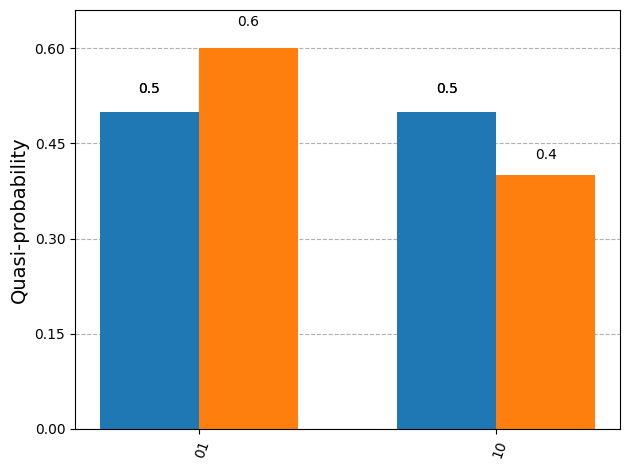

In [14]:
from qiskit.visualization import plot_histogram

expected_counts = {'01': 0.5 * shots, '10': 0.5 * shots}

plot_histogram([expected_counts, counts])

## Uniform Superposition

A useful *algorithmic primitive* is the preparation of the **uniform superposition**

$$
\ket{\psi}\;=\;\frac{1}{\sqrt{2^{\,n}}}\sum_{k=0}^{2^{\,n}-1}\ket{k},
$$

where $k$ is the decimal (base-10) label of an $n$-qubit computational-basis state.
For $n=2$ the mapping is

$$
\ket{0}\!=\!\ket{00}, \quad
\ket{1}\!=\!\ket{01}, \quad
\ket{2}\!=\!\ket{10}, \quad
\ket{3}\!=\!\ket{11}.
$$

A single-qubit Hadamard ($H$) gate transforms $\ket{0}$ into an equal superposition of $\ket{0}$ and $\ket{1}$.
Hence, to create the uniform superposition on $n$ qubits we simply apply an $H$ gate to **each** qubit.

### Exercise 1.2

Complete the function **below** so that, given a `QuantumCircuit` instance `qc` and an integer `n` specifying the number of qubits, it returns a circuit that prepares a uniform superposition across those $n$ qubits.

In [ ]:
# solution
def uniform_superposition(qc, n):
    for q in range(n):
        qc.h(q)
    qc.measure_all()
    return qc

n = 3
qc = QuantumCircuit(n)

qc = uniform_superposition(qc, n)
qc.draw()

┌───┐ ░ ┌─┐      
   q_0: ┤ H ├─░─┤M├──────
        ├───┤ ░ └╥┘┌─┐   
   q_1: ┤ H ├─░──╫─┤M├───
        ├───┤ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├─░──╫──╫─┤M├
        └───┘ ░  ║  ║ └╥┘
meas: 3/═════════╩══╩══╩═
                 0  1  2

# Exercise 1.3

Simulate the your state-preparation circuit using the `AerSimulator` backend and plot your results using `plot_histogram`.

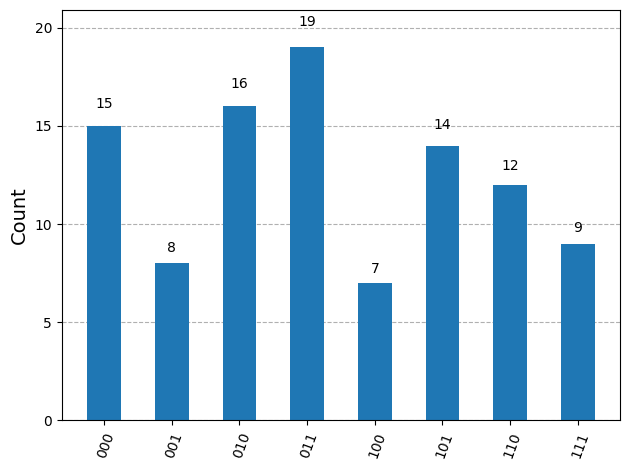

In [9]:
# solution
shots = 100
backend = AerSimulator()
tqc     = transpile(qc, backend)
result  = backend.run(tqc, shots=shots).result()
counts = result.get_counts()
plot_histogram(counts)

## Summary

The basic workflow is:

1. Create a quantum `QuantumCircuit` object with a register of `n` qubits and a classical register of (typically) `n` bits, where the classical registers store the read-out state of each qubit.

2. Construct the quantum circuit, specifying the application of quantum gates and measurement operations on particular qubits.

3. Transpile the circuit to run on a target backend—either a simulator or real hardware. Transpilation optimizes the circuit and expresses it in the "native-gate" set of the target. Transpilers for real (noisy) hardware will also work to minimize circuit depth and error rates by accounting for the relative fidelity and physical layout of the qubits on the QPU.

4. Submit the circuit to the device, which is executed repeatedly to collect results for a specified number of shots, sampling the quantum distribution.

5. Retrieve the results, which are formatted as a dictionary of bitstrings and counts.

6. Post-process the results for the next stage of computation or human interpretability.